<a href="https://colab.research.google.com/github/sinaabbasi1/applied-data-science/blob/main/Assignments/Assignment%2002/ADS_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Dataset
The dataset we work with in this assignment is hosted on [Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). It contains 303 records of data about different patients, containing their medical records and health condition whether the chance of having a heart attack is low or high.

Down below, you can see some definitions of dataset which we are using:

*   Age : Age of the patient
*   Sex : Sex of the patient
*   exang: exercise induced angina (1 = yes; 0 = no)
*   ca: number of major vessels (0-3)
*   cp : Chest Pain type chest pain type
    *   Value 1: typical angina
    *   Value 2: atypical angina
    *   Value 3: non-anginal pain
    *   Value 4: asymptomatic

*   trtbps : resting blood pressure (in mm Hg)
*   chol : cholestoral in mg/dl fetched via BMI sensor
*   fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   rest_ecg : resting electrocardiographic results
    *   Value 0: normal
    *   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    *   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

*   thalach : maximum heart rate achieved
*   target : 0= less chance of heart attack 1= more chance of heart attack

# Exploratory Data Analysis

In the first part of the assignment, we focus on performing some Exploratory Data Anlsyis (EDA). let's start ...

Downloading the dataset:

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset')

Importing libraries that we need:

In [ ]:
import pandas as pd
import io
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

Reading our dataset which is a csv file:

In [ ]:
df = pd.read_csv('/content/heart-attack-analysis-prediction-dataset/heart.csv')
print(df.shape)

(303, 14)


At a glance:

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


And here's a summary of the dataset as a whole. As we can see there is no missing value.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


A summary of the columns from a statistics point of view, i.e. max, min, mean and standard deviation of values.

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Age distribution of patients:

In [ ]:
df['age'].value_counts()[:15]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
Name: age, dtype: int64

Number of each gender:

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Number of each chest pain:

In [ ]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

##Pie Plot

And now the plot of cp and sex columns. As we can see it gives us better insight.

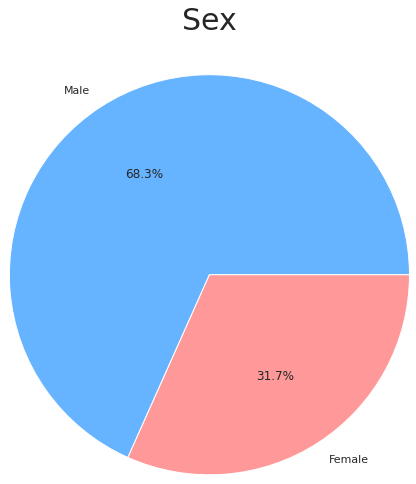

In [ ]:
sex_label = {'Male': df[df.sex == 1].shape[0], 'Female': df[df.sex == 0].shape[0]}

plt.pie([i for i in sex_label.values()], labels=[i for i in sex_label.keys()], autopct='%1.1f%%', radius=2.3, colors = ['#66b3ff', '#ff9999'])
plt.title('Sex', y=1.6, fontsize=30)
plt.show()

##Bar Plot

Now we define barplot function for simplicity.

In [ ]:
def barplot(column, xlabel, ylabel, title, xticks_flag=False, ticks=None, figsize=(10, 6)):
  plt.figure(figsize = figsize)
  x = np.array([str(i) for i in df[column].unique()])
  y = np.array(df[column].value_counts())
  plt.bar(x, y)
  plt.xlabel(xlabel)
  if (xticks_flag):
    plt.xticks(x, ticks)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

Here we go, some barplot:

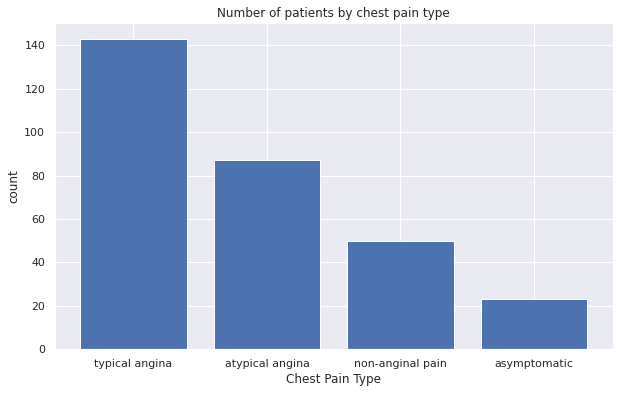

In [ ]:
barplot('cp', 'Chest Pain Type', 'count', 'Number of patients by chest pain type',True, ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])

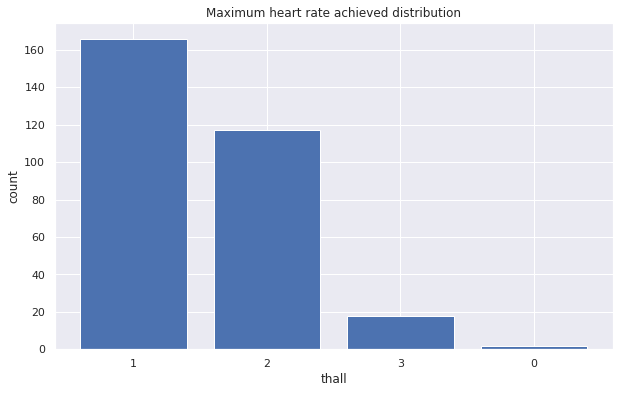

In [ ]:
barplot('thall', 'thall', 'count', 'Maximum heart rate achieved distribution')

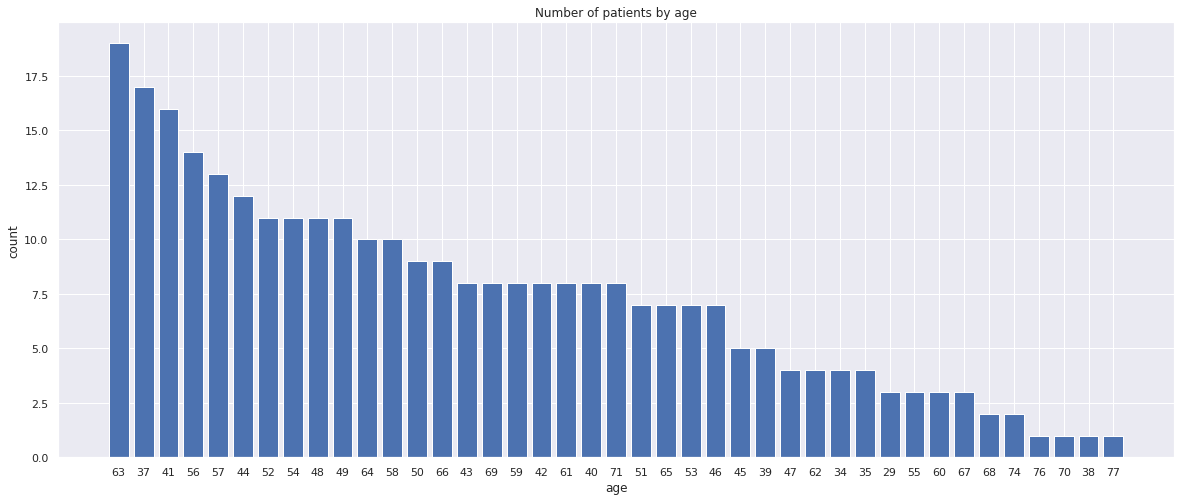

In [ ]:
barplot('age', 'age', 'count', 'Number of patients by age', figsize=(20, 8))

##Scatter Plot

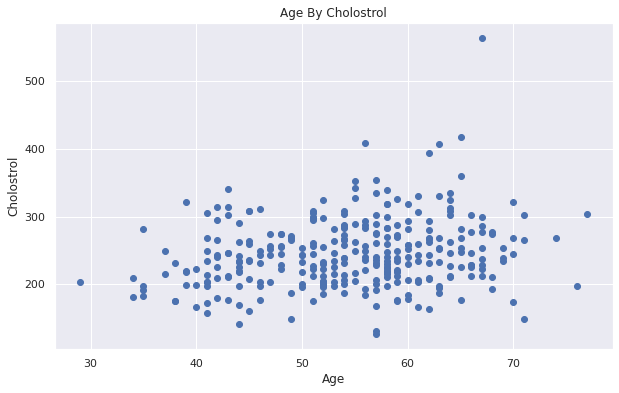

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(df.age, df.chol)
plt.xlabel('Age')
plt.ylabel('Cholostrol')
plt.title('Age By Cholostrol')
plt.show()

##Nested Pie Plot

Let's do some advanced visualization 😉

Number of patients by chest pain type by each group.

output : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
cp_by_output = df.groupby(['cp', 'output']).size()
cp_by_output

cp  output
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          69
3   0           7
    1          16
dtype: int64

For two level nested pie plot we need inner labels and outer labels. We already made outer labels named as *cp_by_output* variable. Now we define inner labels:

In [ ]:
inner_labels = cp_by_output.index
cp_by_output.index

MultiIndex([(0, 0),
            (0, 1),
            (1, 0),
            (1, 1),
            (2, 0),
            (2, 1),
            (3, 0),
            (3, 1)],
           names=['cp', 'output'])

In [ ]:
outer = df.groupby('cp').size()
outer.values

array([143,  50,  87,  23])

In [ ]:
outer.index

Int64Index([0, 1, 2, 3], dtype='int64', name='cp')

Bam! ✴ Here we go again:

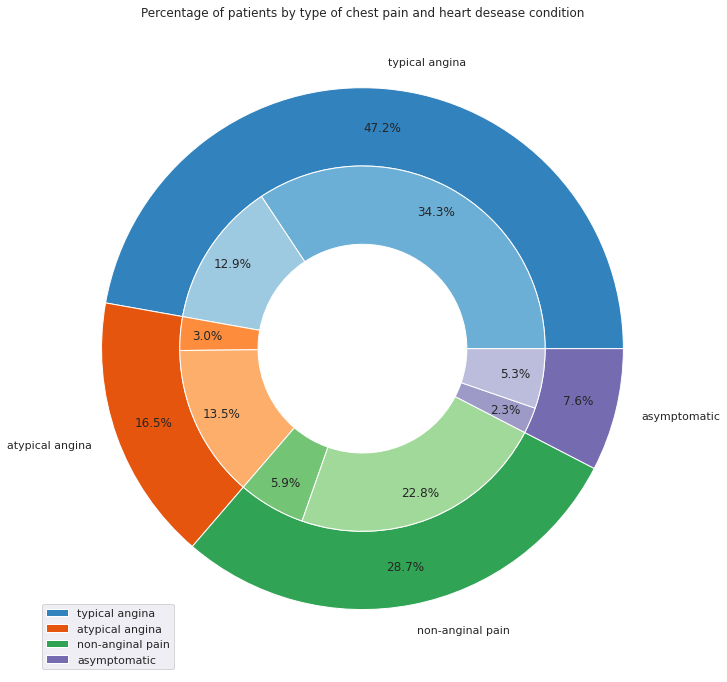

In [ ]:
fig, ax = plt.subplots(figsize=(24,12))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 13, 14]))

ax.pie(outer.values, radius=1,
       labels= ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'],
       autopct='%1.1f%%',
       colors=outer_colors,
       pctdistance=(1-size/2),
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(cp_by_output.values.flatten(), radius=1-size,
       labels = None,
       autopct='%1.1f%%',
       pctdistance=(1-size/2),
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# plt.xticks([0, 1, 2, 3], x = np.array([str(i) for i in df[column].unique()]))
# plt.label("")
ax.legend()
# ax.set_title("Matplotlib bakery: A pie")
ax.set(aspect="equal", title='Percentage of patients by type of chest pain and heart desease condition')
plt.show()

Number of exercise induced angina (1 = yes; 0 = no) for each output:

In [ ]:
df.groupby(['exng', 'output']).size().reset_index(name='counts')


,exng,output,counts
0,0,0,62
1,0,1,142
2,1,0,76
3,1,1,23


# Data Cleaning
Next step would be to clean the data. We will check for missing values, possible invalid data, duplicate rows and do some correlation analysis.

## Handling missing values
The first thing to do would be to check how many columns have missing values:

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Ops!! We don't have any missing value!!

##Dealing with Invalid Values
Next step would be check for inavlid data. This step usually involves checking for unusual patterns in the data.

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We noticed that number of major vessels (caa) must be in range of (0, 3):

In [ ]:
df.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [ ]:
df[df.caa == 4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


##Dealing with Outliers
Removing "outliers" from data is also a good preprocessing step. However, it should be handled via outmost care, as a record that looks to be an outlier, could be a relevant data point.

Another function for reusibility:

In [ ]:
def boxplot(column):
  col = [column]
  Q1 = df[col].quantile(0.2)  # Find first quantile range
  Q4 = df[col].quantile(0.8)  # and 5th quantile range
  IQR = Q4 - Q1
  df1 = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q4 + 1.5 * IQR))).any(axis=1)]
  df1.boxplot(column = col)

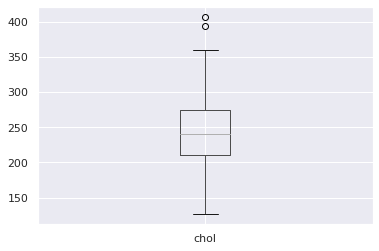

In [ ]:
boxplot('chol')

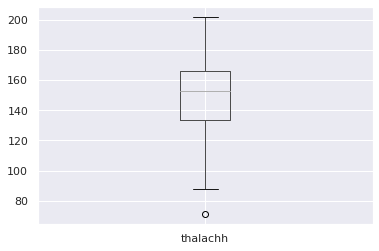

In [ ]:
boxplot('thalachh')

##Dealing with duplicate data
First, we check to see if there are any duplicate rows.

There is only one duplicate data that we think it's not a fault and totally make sense that two patients have the same attributes!

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalizing_columns = ['age', 'trtbps','thalachh','chol']
df[normalizing_columns] = scaler.fit_transform(df[normalizing_columns])
df[normalizing_columns].describe()

,age,trtbps,thalachh,chol
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-7.035077e-16,-6.800574e-16,-1.113887e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-3.439267e+00,-2.324160e+00
25%,-7.572802e-01,-6.638668e-01,-7.061105e-01,-6.814943e-01
50%,6.988599e-02,-9.273778e-02,1.466343e-01,-1.210553e-01
75%,7.316189e-01,4.783913e-01,7.151309e-01,5.456738e-01
max,2.496240e+00,3.905165e+00,2.289429e+00,6.140401e+00


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,3.030000e+02,303.000000,303.000000,3.030000e+02,3.030000e+02,303.000000,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,4.690051e-17,0.683168,0.966997,-7.035077e-16,-1.113887e-16,0.148515,0.528053,-6.800574e-16,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,1.001654e+00,0.466011,1.032052,1.001654e+00,1.001654e+00,0.356198,0.525860,1.001654e+00,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,-2.797624e+00,0.000000,0.000000,-2.148802e+00,-2.324160e+00,0.000000,0.000000,-3.439267e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,0.000000,0.000000,-6.638668e-01,-6.814943e-01,0.000000,0.000000,-7.061105e-01,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,6.988599e-02,1.000000,1.000000,-9.273778e-02,-1.210553e-01,0.000000,1.000000,1.466343e-01,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,7.316189e-01,1.000000,2.000000,4.783913e-01,5.456738e-01,0.000000,1.000000,7.151309e-01,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,2.496240e+00,1.000000,3.000000,3.905165e+00,6.140401e+00,1.000000,2.000000,2.289429e+00,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Preprocessing Normalization/Stadardization

As our dataset already has been preprocessed and normalized. Following we used another dataset for this purpose.



#Correlation Analysis

Now it's a good time to perform correlation analysis

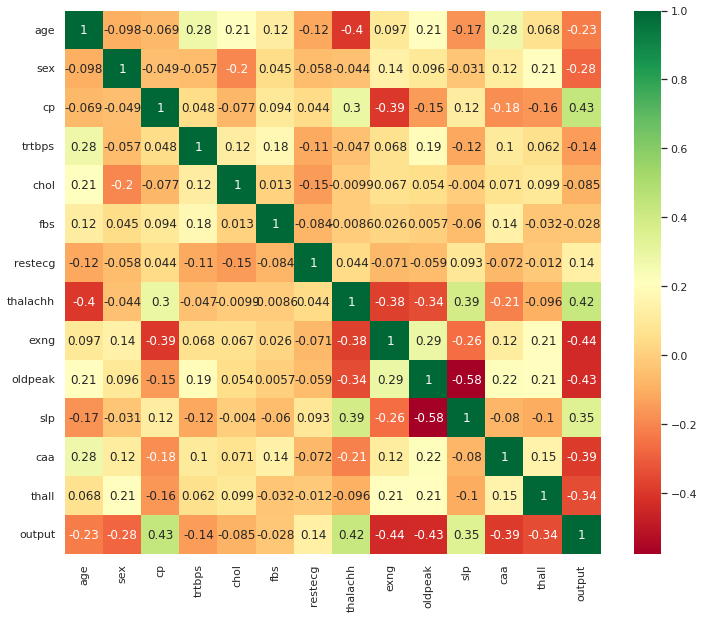

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

#Second Dataset
We were not able to perform missing values operations in last dataset, becacuse there was not any missing values in "Heart Disease" dataset actually!

So we decided to choose another dataset : "Car Category Ads on the Divar Website"


In [ ]:
od.download("https://www.kaggle.com/datasets/sinatavakolibanizi/dataset-of-car-category-ads-on-the-divar-site")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: emranshahbazi
Your Kaggle Key: ··········


100%|██████████| 16.6M/16.6M [00:00<00:00, 56.4MB/s]


In [ ]:
file = ('/content/dataset-of-car-category-ads-on-the-divar-site/divar_posts_vehicles.csv')

In [ ]:
data = pd.read_csv(file)
data.set_index("id", inplace=True)
data.drop(columns="Unnamed: 0", inplace =True)
print(data.shape)

(206260, 15)


In [ ]:
data.head()

,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,image_count,mileage,platform,price,title,type,year
id,,,,,,,,,,,,,,,
63194439667302,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
44297825572265,False,NaN,vehicles,parts-accessories,NaN,Tehran,Tuesday 10PM,خازن ۳۰ فاراد . Q.PERTORS . تمیز 20 ولت,2,NaN,mobile,50000,خازن فروشی,NaN,NaN
59878876364899,False,سایر,vehicles,cars,light,Tehran,Wednesday 04AM,دوگانه ال پی جی بیمه با تخفیف دارد \nتودوزی نو...,3,180000.0,mobile,-1,پاترول شش سیلندر چهار درب,NaN,1366
35669737153803,False,NaN,vehicles,parts-accessories,NaN,Tehran,Wednesday 09AM,کمک فنر روغنی تعمیری,2,NaN,mobile,50000,کمک فنر روغنی,NaN,NaN
8901787243519,False,NaN,vehicles,parts-accessories,NaN,Shiraz,Wednesday 10AM,چهار عدد لاستیک خوب کار کرده با قیمت توافقی,0,NaN,mobile,-1,چهار عدد لاستیک پژو در حد نو,NaN,NaN


In [ ]:
data.isnull().sum()

archive_by_user         0
brand               85809
cat1                    0
cat2                    0
cat3                75817
city                    0
created_at              0
desc                    0
image_count             0
mileage             85809
platform                0
price                   0
title                   0
type               206260
year                85809
dtype: int64

In [ ]:
data[data.duplicated()].shape

(0, 15)

There is no duplicate records luckily 😊

In [ ]:
data[data.price==-1].shape[0]

37104

In [ ]:
data.type.unique()

array([nan])

In [ ]:
data.brand.value_counts()

پراید صندوق‌دار::Pride             28299
پژو ۴۰۵::Peugeot 405               11918
پژو ۲۰۶‍::Peugeot 206               9827
سایر                                8955
پژو پارس::Peugeot Pars              8518
سمند::Samand                        8500
پراید هاچ‌بک::Pride                 5974
پیکان::Peykan                       4841
وانت                                4369
پژو روآ / آر‌دی::RD/ROA             3880
نیسان::Nissan                       3672
تیبا::Tiba                          3257
ام‌وی‌ام::MVM                       3208
پژو ۲۰۶‍ صندوق‌دار::Peugeot 206     2732
هیوندای (غیره)::Hyundai             2436
تندر ۹۰::Tondar 90                  1989
زانتیا::Citroen Xantia              1320
کیا::Kia                            1237
رنو::Renault                        1228
تویوتا::Toyota                       955
لیفان::Lifan                         686
دوو::Daewoo                          673
بنز::Mercedes-Benz                   591
رانا::Runna                          585
بی‌ام‌و::BMW    

In [ ]:
data[data.brand.isnull()].head()

,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,image_count,mileage,platform,price,title,type,year
id,,,,,,,,,,,,,,,
63194439667302,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
44297825572265,False,NaN,vehicles,parts-accessories,NaN,Tehran,Tuesday 10PM,خازن ۳۰ فاراد . Q.PERTORS . تمیز 20 ولت,2,NaN,mobile,50000,خازن فروشی,NaN,NaN
35669737153803,False,NaN,vehicles,parts-accessories,NaN,Tehran,Wednesday 09AM,کمک فنر روغنی تعمیری,2,NaN,mobile,50000,کمک فنر روغنی,NaN,NaN
8901787243519,False,NaN,vehicles,parts-accessories,NaN,Shiraz,Wednesday 10AM,چهار عدد لاستیک خوب کار کرده با قیمت توافقی,0,NaN,mobile,-1,چهار عدد لاستیک پژو در حد نو,NaN,NaN
17371942140300,False,NaN,vehicles,parts-accessories,NaN,Shiraz,Thursday 09AM,این پکیج شامل سوپرچیپ دراگون که یک مغز الکترون...,1,NaN,mobile,300000,پکیج افزایش شتاب خودرو,NaN,NaN


In [ ]:
data.cat1.value_counts() #

vehicles    206260
Name: cat1, dtype: int64

For all records, "cat1" column is equal to : "vehicles"

In [ ]:
data.cat2.value_counts()

cars                 130443
parts-accessories     55986
motorcycles           19831
Name: cat2, dtype: int64

In [ ]:
data.cat3.value_counts()

light    120451
heavy      9992
Name: cat3, dtype: int64

In [ ]:
data[(data.mileage.isnull()) & (data.brand.isnull())].shape[0]

85809

In [ ]:
data[(data.brand.isnull())].shape[0]

85809

There is some records that are related to cars, something like car accessories that these are not our intrest so we ignore them. Plus, for some records, the "price" column filled by (-1) that doesn't make any sense and also there is no way to fill them with some reasonable values

In [ ]:
data.drop(data[(data.mileage.isnull()) | (data.brand.isnull()) | (data.price == -1)].index, inplace=True)
data.shape

(103799, 15)

In [ ]:
data.cat1.value_counts()

vehicles    103799
Name: cat1, dtype: int64

In [ ]:
data.cat2.value_counts()

cars    103799
Name: cat2, dtype: int64

In [ ]:
data.cat3.value_counts()

light    103799
Name: cat3, dtype: int64

As we can see, after deleting some records in four cells ago, columns of "cat1", "cat2", "cat3" are filled with only one unique value, so we can delete them and "type" column filled with (NaN) in all records, so we can delete this column too!

In [ ]:
data.drop(['cat1', 'cat2', 'cat3', 'type'], axis=1, inplace=True)
data.shape

(103799, 11)

In [ ]:
data.isnull().sum()

archive_by_user    0
brand              0
city               0
created_at         0
desc               0
image_count        0
mileage            0
platform           0
price              0
title              0
year               0
dtype: int64

In [ ]:
data.city.unique()

array(['Karaj', 'Tehran', 'Ahvaz', 'Isfahan', 'Mashhad', 'Shiraz',
       'Kermanshah', 'Qom', 'Tabriz'], dtype=object)

In [ ]:
data.brand.unique()

array(['پژو ۴۰۵::Peugeot 405', 'نیسان::Nissan', 'سمند::Samand',
       'ام\u200cوی\u200cام::MVM', 'پراید صندوق\u200cدار::Pride',
       'پراید هاچ\u200cبک::Pride', 'سایر', 'پژو ۲۰۶\u200d::Peugeot 206',
       'پیکان::Peykan', 'پژو پارس::Peugeot Pars',
       'پژو روآ / آر\u200cدی::RD/ROA',
       'پژو ۲۰۶\u200d صندوق\u200cدار::Peugeot 206', 'تیبا::Tiba', 'وانت',
       'کیا::Kia', 'رنو::Renault', 'رانا::Runna', 'دوو::Daewoo',
       'هیوندای (غیره)::Hyundai', 'زانتیا::Citroen Xantia',
       'تندر ۹۰::Tondar 90', 'تویوتا::Toyota', 'لیفان::Lifan',
       'بنز::Mercedes-Benz', 'هیوندای سوناتا::Hyundai Sonata',
       'بی\u200cام\u200cو::BMW'], dtype=object)

In [ ]:
data.archive_by_user.unique()

array([False,  True])

**CATEGORICAL DATA TRANSFORMATION**

In [ ]:
columns_to_be_categorical = ['archive_by_user', 'brand', 'city']
columns_to_be_one_hot_encoded = ['platform']

for column in columns_to_be_categorical:
  data[column] = data[column].astype('category').cat.codes

for column in columns_to_be_one_hot_encoded:
    encoded_data = pd.get_dummies(data[column])
    data[encoded_data.columns] = encoded_data

data.drop(columns_to_be_one_hot_encoded, axis=1, inplace=True)
data.head()

,archive_by_user,brand,city,created_at,desc,image_count,mileage,price,title,year,mobile,web
id,,,,,,,,,,,,
51728781836074,0,23,2,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0,290000.0,8500000,پژو مدل 81 مشکی,1381,0,1
26591305369165,0,13,8,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,3,175000.0,19500000,پاترول 2در,1372,1,0
35066474998268,0,11,8,Thursday 07AM,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,4,80000.0,23900000,سمند دوگانه کارخانه,1391,0,1
20806323919288,0,23,8,Thursday 08AM,بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم,3,125000.0,8500000,پژو405 مدل84,1384,1,0
48878782822302,0,0,8,Thursday 08AM,ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...,2,11000.0,18500000,ام وی ام 110 چهار سیلندر,1393,1,0


In [ ]:
data['year'][data.year == '<1366'] = '1366'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.year.value_counts()

1393    10898
1390     8793
1394     8571
1389     7062
1391     6449
1388     6436
1383     5753
1386     5625
1387     5604
1392     5534
1385     5459
1384     5392
1395     5279
1382     4528
1381     3354
1380     2079
1379     1412
1378      946
1366      933
1377      884
1376      657
1375      508
1373      409
1372      366
1374      345
1371      248
1370      118
1368       57
1367       52
1369       48
Name: year, dtype: int64

##Normalization/Stadardization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
normalizer = StandardScaler()
scaler = MinMaxScaler()

normalizing_columns = ['mileage', 'price']
data[normalizing_columns] = normalizer.fit_transform(data[normalizing_columns])

scaling_columns = ['brand', 'city', 'image_count', 'year']
data[scaling_columns] = scaler.fit_transform(data[scaling_columns])

data.head()

,archive_by_user,brand,city,created_at,desc,image_count,mileage,price,title,year,mobile,web
id,,,,,,,,,,,,
51728781836074,0,0.92,0.25,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0.000000,1.909658,-0.562708,پژو مدل 81 مشکی,0.517241,0,1
26591305369165,0,0.52,1.00,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,0.214286,0.735591,-0.145700,پاترول 2در,0.206897,1,0
35066474998268,0,0.44,1.00,Thursday 07AM,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,0.285714,-0.234290,0.021104,سمند دوگانه کارخانه,0.862069,0,1
20806323919288,0,0.92,1.00,Thursday 08AM,بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم,0.214286,0.225128,-0.562708,پژو405 مدل84,0.620690,1,0
48878782822302,0,0.00,1.00,Thursday 08AM,ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...,0.142857,-0.938729,-0.183609,ام وی ام 110 چهار سیلندر,0.931034,1,0
